In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
import difflib
warnings.filterwarnings('ignore')

In [2]:
## Data Loading
# Load data from Excel file with multiple sheets
students_ireland = pd.read_excel('Data.xlsx', sheet_name='Students_Ireland')
parents_ireland = pd.read_excel('Data.xlsx', sheet_name='Parents_Ireland')
students_india = pd.read_excel('Data.xlsx', sheet_name='Students_India')
parents_india = pd.read_excel('Data.xlsx', sheet_name='Parents_India')

In [3]:
## Add Country and Group Labels
# Add country and group labels for identification
students_ireland['Country'] = 'Ireland'
students_ireland['Group'] = 'Student'
parents_ireland['Country'] = 'Ireland'
parents_ireland['Group'] = 'Parent'
students_india['Country'] = 'India'
students_india['Group'] = 'Student'
parents_india['Country'] = 'India'
parents_india['Group'] = 'Parent'

In [4]:
## Data Cleaning - Remove Unnecessary Columns
# Remove administrative columns that are not needed for analysis
# Using exact matches to avoid removing important survey columns

# Function to remove columns if they exist
def clean_dataframe(df, name):
    original_cols = len(df.columns)
    cols_to_drop = []
    
    # Look for exact administrative column patterns (case-insensitive)
    for col in df.columns:
        cleaned_col = col.strip().lower()
        
        # Check for exact matches or very specific patterns only
        if (cleaned_col == 'completion time' or 
            cleaned_col == 'timestamp' or
            cleaned_col == 'start time' or
            cleaned_col == 'end time' or
            cleaned_col == 'duration' or
            cleaned_col == 'email' or
            cleaned_col == 'name' or
            cleaned_col == 'id' or
            cleaned_col == 'participant_id' or
            cleaned_col == 'response_id' or
            cleaned_col == 'ip_address' or
            cleaned_col == 'user_agent' or
            cleaned_col == 'session_id' or
            cleaned_col == 'survey_id' or
            cleaned_col == 'Sheet'
            'completiontime' in cleaned_col.replace(' ', '') or
            'starttime' in cleaned_col.replace(' ', '') or
            'endtime' in cleaned_col.replace(' ', '')):
            cols_to_drop.append(col)
    
    if cols_to_drop:
        df_cleaned = df.drop(columns=cols_to_drop)
        print(f"{name}: Removed {len(cols_to_drop)} columns: {cols_to_drop}")
        print(f"  Columns reduced from {original_cols} to {len(df_cleaned.columns)}")
        return df_cleaned
    else:
        print(f"{name}: No unnecessary columns found")
        return df

# Clean all datasets
students_ireland = clean_dataframe(students_ireland, "Students Ireland")
students_india = clean_dataframe(students_india, "Students India")
parents_ireland = clean_dataframe(parents_ireland, "Parents Ireland")
parents_india = clean_dataframe(parents_india, "Parents India")

Students Ireland: Removed 1 columns: ['timestamp']
  Columns reduced from 13 to 12
Students India: Removed 5 columns: ['Id', 'Start time', 'Completion time', 'Email', 'Name']
  Columns reduced from 50 to 45
Parents Ireland: Removed 1 columns: ['timestamp']
  Columns reduced from 29 to 28
Parents India: Removed 5 columns: ['Id', 'Start time', 'Completion time', 'Email', 'Name']
  Columns reduced from 25 to 20


In [5]:
students_india.head()

,What age are you?\n,Are you a boy or a girl?\n,Would you like to go to college when you finish secondary school? \n\n,What would you like to be when you are older?,How confident are you in your coding skills?,How confident are you in your computer skills?,How interested are you in science and technology?,How interested are you in maths?\n,Do you have any of the following types of technology in the home? (Please choose as many as apply),How many hours do you use technology each day?,...,Which STEM area would you prefer for your further education?,"Compared to most of your other school subjects, how good do you think you’d be at coding? 1 on the scale means not good at all compared to your other school subjects and 7 on the scale means much bett","I think that girls usually do well in technology. Please rate how much you agree with this statement on a scale from 0 to 100 by writing a number in the box, where 0 is not true at all and 100 is very","I think that boys usually do well in technology. Please rate how much you agree with this statement on a scale from 0 to 100 by writing a number in the box, where 0 is not true at all and 100 is very","I think that children who are neither boys or girls do well in technology. Please rate how much you agree with this statement on a scale from 0 to 100 by putting a tick in the box, where 0 is not true",What do you think you can do if you are a coder? \n,"Have you ever taken any computer science courses in the past? (if yes, write in ""other"" the age you were when you did the computer science course)","Have you ever taken any coding courses in the past? (if yes, write in ""other"" the age you were when you did the coding course AND write the language(s), technologies, software learned)",Country,Group
0,14,Girl,Yes,Not Decided,A little confident,Quite a bit confident,Quite a bit interested,Really interested,Smartphone;iPad/Tablet;Laptop;WiFi Internet;De...,0-2,...,"Science (e.g., Biology, Chemistry, Physics)",3,100,100.0,0,I can make my own games and websites.,No,Scratch,India,Student
1,18,Boy,Yes,Not sure,Quite a bit confident,Quite a bit confident,Quite a bit interested,Quite a bit interested,Smartphone;iPad/Tablet;Laptop;3/4G Internet;Wi...,5+,...,"Engineering (e.g., Mechanical, Electrical, Civil)",6,50,50.0,100,Lots of things,11,"11 - Python, Java, etc",India,Student
2,14,Boy,Yes,Not sure,Not at all confident,A little confident,A little interested,Really interested,Smartphone;Desktop computer;WiFi Internet;Lapt...,5+,...,"Mathematics (e.g., Statistics, Applied Math, D...",3,25,65.0,50,Not sure,No,No,India,Student
3,11,Boy,Yes,IAS officer,A little confident,Really confident,Quite a bit interested,Really interested,iPad/Tablet;WiFi Internet;,0-2,...,"Science (e.g., Biology, Chemistry, Physics)",4,90,100.0,0,Build games and educational sites,No,No,India,Student
4,12,Girl,Yes,Actress,Not at all confident,A little confident,Quite a bit interested,A little interested,Smartphone;iPad/Tablet;Laptop;3/4G Internet;Wi...,5+,...,Arts,Not good at all 1,80,95.0,75,hacking,No,No,India,Student


In [6]:
students_ireland.head()

,Sheet,Are you a boy or a girl,Would you like to go to college when you finish secondary school?,What would you like to be when you are older?,How confident are you in your computer skills?,How confident are you in your coding skills?,How interested are you in science and technology?,How interested are you in maths?,Source of dataset,Camp,Country,Group
0,1,1,1,Something to do with technology/writing,3,3,3,4,O,1,Ireland,Student
1,2,1,1,Electrical engineer,3,4,1,2,O,1,Ireland,Student
2,3,2,1,Doctor/ medicinal scientist,2,3,1,3,O,1,Ireland,Student
3,4,2,1,A primary school teacher,3,3,2,2,O,1,Ireland,Student
4,5,1,1,Pro footballer,4,4,3,4,O,1,Ireland,Student


In [7]:
parents_india.head()

,Do you have any of the following types of technology in the home? (Please choose as many as apply),"Do you think that technology helps your child’s learning? If yes, how? If not, why not? \n","Do you have a qualification in a science, technology, engineering or mathematics (STEM) field?","If yes, what is your qualification?",Which sector do you work in?,How would STEM skills impact your child’s future (education and career)?,Please select the option on the scale below that reflects your opinion on the following statements: .My child finds technology,Please select the option on the scale below that reflects your opinion on the following statements: .My child finds coding,Please select the option on the scale below that reflects your opinion on the following statements: \n.My child finds technology,Please select the option on the scale below that reflects your opinion on the following statements: \n.My child finds coding,"Please select the option on the scale below that reflects your opinion on the following statements: \n.To do well in coding, my child has to try","I think that girls usually do well in technology. Please rate how much you agree with this statement on a scale from 0 to 100 by writing a number in the box, where 0 is not true at all and 100 is very","I think that boys usually do well in technology. Please rate how much you agree with this statement on a scale from 0 to 100 by writing a number in the box, where 0 is not true at all and 100 is very","Finally, listed there are 5 STEM subjects listed below. For each one please indicate how suitable you think men or women are for each subject by checking the appropriate box. There are no right or wro","Finally, listed there are 5 STEM subjects listed below. For each one please indicate how suitable you think men or women are for each subject by checking the appropriate box. There are no right or wro1","Finally, listed there are 5 STEM subjects listed below. For each one please indicate how suitable you think men or women are for each subject by checking the appropriate box. There are no right or wro2","Finally, listed there are 5 STEM subjects listed below. For each one please indicate how suitable you think men or women are for each subject by checking the appropriate box. There are no right or wro3","Finally, listed there are 5 STEM subjects listed below. For each one please indicate how suitable you think men or women are for each subject by checking the appropriate box. There are no right or wro4",Country,Group
0,Smartphone;iPad/Tablet;Laptop Computer;3/4G In...,Yes- integral part of learning these days,Yes,BE,Business,Too early to stay- could be the career itself ...,Interesting,Somewhat Boring,Neither Hard nor Easy,Neither Hard nor Easy,A little 7,100,100,Neutral 4,Neutral 4,Neutral 4,Neutral 4,Neutral 4,India,Parent
1,Smartphone;iPad/Tablet;Laptop Computer;WiFi In...,Yes thru access to the web.,Yes,"BE, MBA",Business,Will improve prospects,Very Interesting,Neither boring Nor Interesting,Easy,Hard,3,50,50,Neutral 4,Neutral 4,Neutral 4,3,5,India,Parent
2,Smartphone;iPad/Tablet;Laptop Computer;3/4G In...,Yes. Provides ready access to a wide variety o...,No,NaN,Business,They will help the child build a better apprec...,Very Interesting,Somewhat Interesting,Easy,Easy,7,50,70,Neutral 4,Neutral 4,Neutral 4,Neutral 4,Neutral 4,India,Parent
3,Smartphone;iPad/Tablet;Laptop Computer;3/4G In...,"Yes, Convenient and vast researches can be con...",Yes,Science in school till grade 12th,Self employed,1)Opens up all fields of study/career\n2) Buil...,Very Interesting,Somewhat Interesting,Very Easy,Somewhat Easy,4,100,100,Neutral 4,Neutral 4,Neutral 4,Neutral 4,Neutral 4,India,Parent
4,Smartphone;iPad/Tablet;Laptop Computer;Desktop...,Technology is a two sided coin! Has it’s pros ...,Yes,Had done science with maths and later took scu...,Business,"Well, science helps you everywhere ! Even Leon...",Very Interesting,Interesting,Very Easy,Neither Hard nor Easy,4,70,95,Neutral 4,Neut

In [8]:
parents_ireland.head()

,Sheet,Smartphone,iPad/Tablet,Laptop computer,Desktop computer,3/4g internet,Wifi internet,"Do you think that technology helps your child's learning? If yes, how? If not, why not?","Do you have a qualification in a science, tech0logy, engineering or mathematics (STEM) field?","If yes, what is your qualification?",...,"I think that boys usually do well in technology. Please rate how much you agree with this statement on a scale from 0 to 100 by writing a number in the box, where 0 is not true at all and 100 is very much true",Science,Technology,Maths,Engineering,Computing,Source of dataset,Camp,Country,Group
0,1,1,1,1,0,0,1,"yes, it gives them information they're looking...",1,BSC in physics,...,100,4.0,4.0,4.0,4.0,4.0,O,1.0,Ireland,Parent
1,2,1,1,1,0,1,1,"Yes, technology helps to create learning envir...",1,Masters in computer science,...,100,4.0,4.0,4.0,4.0,4.0,O,1.0,Ireland,Parent
2,3,1,1,1,0,0,1,"Yes helps with research, awareness",0,NaN,...,50,4.0,4.0,4.0,4.0,4.0,O,1.0,Ireland,Parent
3,4,1,1,1,0,1,1,NaN,0,NaN,...,50,5.0,4.0,4.0,3.0,4.0,O,1.0,Ireland,Parent
4,5,1,1,1,1,1,1,It is a great way to explore information,1,Masters of engineering science,...,100,4.0,4.0,4.0,4.0,4.0,O,1.0,Ireland,Parent


In [9]:
## Column Matching Utility
# Helper code to find matching column names in datasets.
def find_column(df, search):
    for col in df.columns:
        if search.strip().lower() in col.strip().lower():
            return col
    matches = difflib.get_close_matches(search.strip(), df.columns, n=1, cutoff=0.6)
    if matches:
        return matches[0]
    raise KeyError(f"Column '{search}' not found in DataFrame. Available columns: {list(df.columns)}")

In [10]:
## Calculate Student TAM Scores
# Calculate TAM scores for students in Ireland and India.

# Mapping for India student data
confidence_map = {
    'Not at all confident': 1, 
    'A little confident': 2, 
    'Quite a bit confident': 3, 
    'Really confident': 4
}
interest_map = {
    'Not at all interested': 1, 
    'A little interested': 2, 
    'Quite a bit interested': 3, 
    'Really interested': 4
}

In [11]:

# Find columns for India students
try:
    coding_conf_col = find_column(students_india, 'How confident are you in your coding skills')
    computer_conf_col = find_column(students_india, 'How confident are you in your computer skills')
    interest_stem_col = find_column(students_india, 'How interested are you in science and technology')
    interest_maths_col = find_column(students_india, 'How interested are you in maths')
    gender_col_india = find_column(students_india, 'Are you a boy or a girl')
except KeyError as e:
    print(f"Error in India students column mapping: {e}")
    raise

In [12]:
# Map India student responses
students_india['coding_confidence_num'] = students_india[coding_conf_col].map(confidence_map)
students_india['computer_confidence_num'] = students_india[computer_conf_col].map(confidence_map)
students_india['interest_stem_num'] = students_india[interest_stem_col].map(interest_map)
students_india['interest_maths_num'] = students_india[interest_maths_col].map(interest_map)

In [13]:
# Calculate TAM scores for India students
students_india['PU_Score'] = students_india[['interest_stem_num', 'interest_maths_num']].mean(axis=1)
students_india['PEOU_Score'] = students_india[['coding_confidence_num', 'computer_confidence_num']].mean(axis=1)
students_india['Attitude_Score'] = students_india[['interest_stem_num', 'interest_maths_num']].mean(axis=1)

# Map gender
gender_map = {'Boy': 1, 'Girl': 2, 'Neither': 3}
students_india['Gender_Num'] = students_india[gender_col_india].map(gender_map)

In [14]:
# Find columns for Ireland students
try:
    interest_stem_col_ie = find_column(students_ireland, 'How interested are you in science and technology')
    interest_maths_col_ie = find_column(students_ireland, 'How interested are you in maths')
    computer_conf_col_ie = find_column(students_ireland, 'How confident are you in your computer skills')
    coding_conf_col_ie = find_column(students_ireland, 'How confident are you in your coding skills')
    gender_col_ie = find_column(students_ireland, 'Are you a boy or a girl')
except KeyError as e:
    print(f"Error in Ireland students column mapping: {e}")
    raise

In [15]:
# Calculate TAM scores for Ireland students
students_ireland['PU_Score'] = students_ireland[[interest_stem_col_ie, interest_maths_col_ie]].mean(axis=1)
students_ireland['PEOU_Score'] = students_ireland[[computer_conf_col_ie, coding_conf_col_ie]].mean(axis=1)
students_ireland['Attitude_Score'] = students_ireland[[interest_stem_col_ie, interest_maths_col_ie]].mean(axis=1)

# Map gender for Ireland
students_ireland['Gender_Num'] = students_ireland[gender_col_ie].map(gender_map)

In [16]:
## Calculate Parent TAM Scores
# Calculate TAM scores for parents in Ireland and India.

# Ireland Parents TAM
parents_ireland['PU_Score'] = parents_ireland['My child finds technology'].fillna(4)
parents_ireland['PEOU_Score'] = parents_ireland['My child finds coding'].fillna(4)

# India Parents TAM mapping
india_tech_map = {
    'Very Boring': 1, 'Somewhat Boring': 2, 'Neither boring Nor Interesting': 3,
    'Somewhat Interesting': 4, 'Interesting': 5, 'Very Interesting': 6
}

In [17]:
# Find columns for India parents
try:
    tech_col_india = find_column(parents_india, 'My child finds technology')
    coding_col_india = find_column(parents_india, 'My child finds coding')
except KeyError as e:
    print(f"Error in India parents column mapping: {e}")
    raise

# Map India parent responses
parents_india['tech_interest_num'] = parents_india[tech_col_india].map(india_tech_map)
parents_india['coding_interest_num'] = parents_india[coding_col_india].map(india_tech_map)

# Calculate TAM scores for India parents
parents_india['PU_Score'] = parents_india['tech_interest_num'].fillna(4)
parents_india['PEOU_Score'] = parents_india['coding_interest_num'].fillna(4)

In [18]:
## Combine Datasets
# Combine student and parent datasets for analysis.
students_combined = pd.concat([
    students_ireland[['PU_Score', 'PEOU_Score', 'Attitude_Score', 'Country', 'Group', 'Gender_Num']],
    students_india[['PU_Score', 'PEOU_Score', 'Attitude_Score', 'Country', 'Group', 'Gender_Num']]
], ignore_index=True)

parents_combined = pd.concat([
    parents_ireland[['PU_Score', 'PEOU_Score', 'Country', 'Group']],
    parents_india[['PU_Score', 'PEOU_Score', 'Country', 'Group']]
], ignore_index=True)

In [19]:
## TAM Comparison Chart
# Visualize average TAM scores for students and parents by country.
# Students comparison
student_means = students_combined.groupby('Country')[['PU_Score', 'PEOU_Score', 'Attitude_Score']].mean().reset_index()
student_melted = pd.melt(student_means, id_vars=['Country'], value_vars=['PU_Score', 'PEOU_Score', 'Attitude_Score'], 
                         var_name='TAM_Dimension', value_name='Score')
fig = px.bar(student_melted, x='Country', y='Score', color='TAM_Dimension', barmode='group',
             title='Student TAM Scores by Country', labels={'Score': 'Average Score'})
fig.update_layout(yaxis=dict(autorange=True), height=500, width=700)
fig.show()

# Parents comparison
parent_means = parents_combined.groupby('Country')[['PU_Score', 'PEOU_Score']].mean().reset_index()
parent_melted = pd.melt(parent_means, id_vars=['Country'], value_vars=['PU_Score', 'PEOU_Score'],
                        var_name='TAM_Dimension', value_name='Score')
fig = px.bar(parent_melted, x='Country', y='Score', color='TAM_Dimension', barmode='group',
             title='Parent TAM Scores by Country', labels={'Score': 'Average Score'})
fig.update_layout(yaxis=dict(autorange=True), height=500, width=700)
fig.show()

### Parent Perceptions of Gender and Technology
This section analyzes how parents in Ireland and India perceive the technological abilities of boys and girls. The scores represent average agreement (0-100 scale) with statements about gender and technology ability. These results are visualized in a heatmap to highlight differences and potential biases.

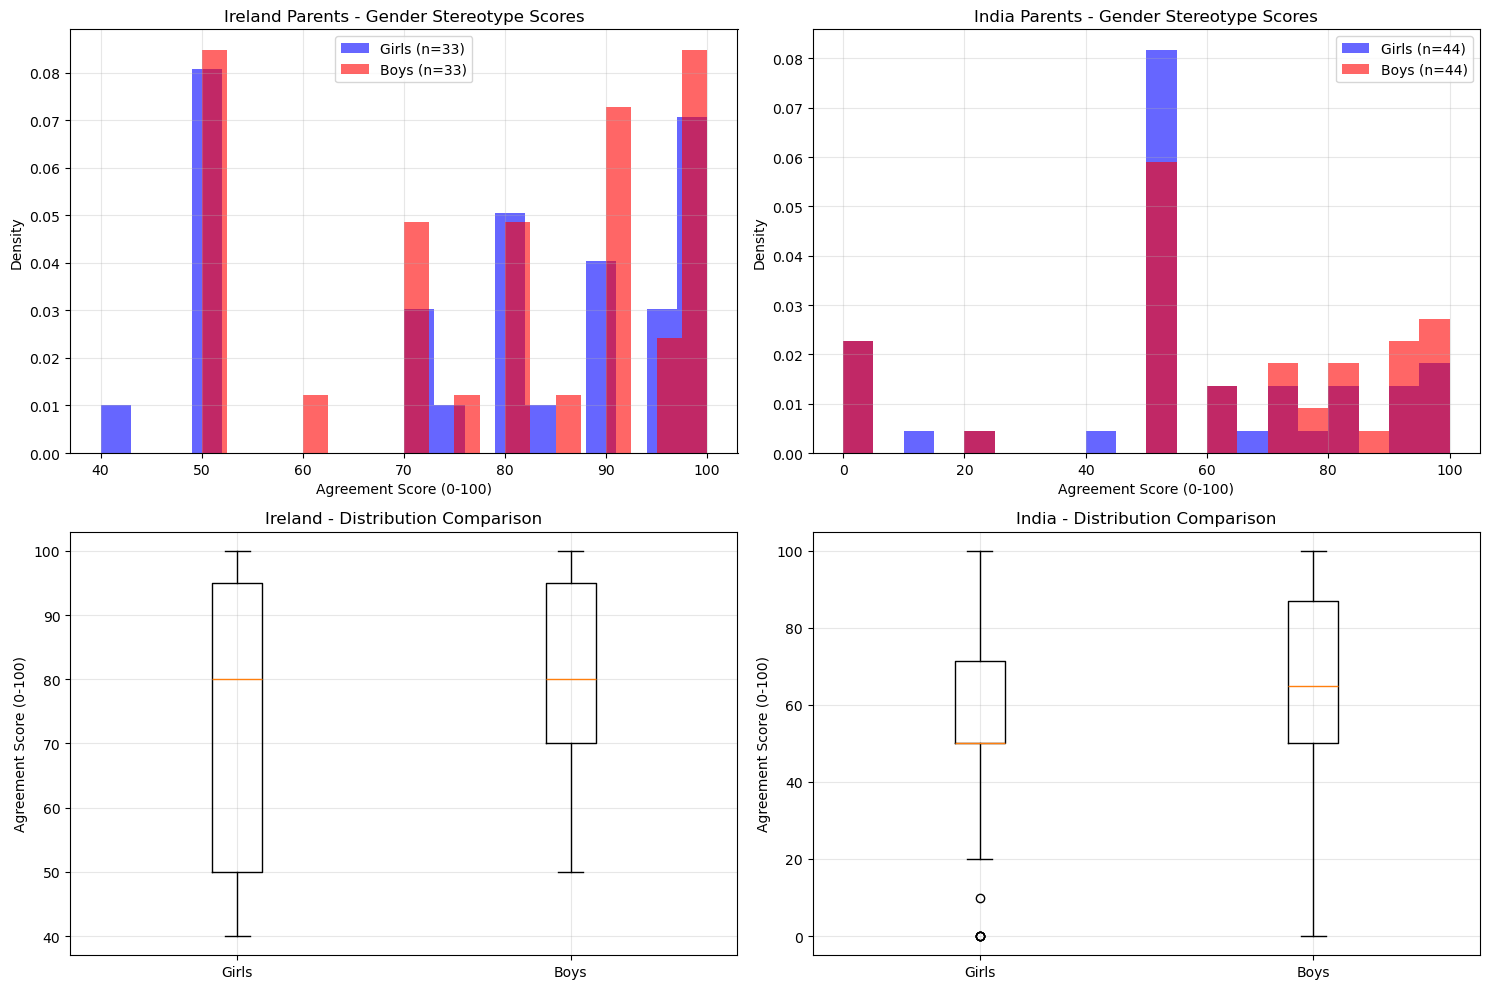

Summary Statistics:
Ireland - Girls: Mean=77.4, Std=20.0
Ireland - Boys: Mean=78.8, Std=18.5
India - Girls: Mean=54.8, Std=28.1
India - Boys: Mean=62.0, Std=29.4


In [20]:
# Gender Stereotype Analysis: Check if variables already exist, if not define them
if 'ireland_girls_col' not in locals():
    ireland_girls_col = 'I think that girls usually do well in technology. Please rate how much you agree with this statement on a scale from 0 to 100 by writing a number in the box, where 0 is not true at all and 100 is very much true'
    ireland_boys_col = 'I think that boys usually do well in technology. Please rate how much you agree with this statement on a scale from 0 to 100 by writing a number in the box, where 0 is not true at all and 100 is very much true'
    india_girls_col = 'I think that girls usually do well in technology. Please rate how much you agree with this statement on a scale from 0 to 100 by writing a number in the box, where 0 is not true at all and 100 is very'
    india_boys_col = 'I think that boys usually do well in technology. Please rate how much you agree with this statement on a scale from 0 to 100 by writing a number in the box, where 0 is not true at all and 100 is very '

# Check Ireland columns
ireland_cols_found = []
for col in [ireland_girls_col, ireland_boys_col]:
    if col in parents_ireland.columns:
        ireland_cols_found.append(col)
    else:
        print(f"Warning: Expected column '{col}' not found in Parents_Ireland dataset")

# Check India columns
india_cols_found = []
for col in [india_girls_col, india_boys_col]:
    if col in parents_india.columns:
        india_cols_found.append(col)
    else:
        print(f"Warning: Expected column '{col}' not found in Parents_India dataset")

# Improved visualization with better data handling
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to numeric and handle NaN values properly
ireland_girls_data = pd.to_numeric(parents_ireland[ireland_girls_col], errors='coerce').dropna()
ireland_boys_data = pd.to_numeric(parents_ireland[ireland_boys_col], errors='coerce').dropna()
india_girls_data = pd.to_numeric(parents_india[india_girls_col], errors='coerce').dropna()
india_boys_data = pd.to_numeric(parents_india[india_boys_col], errors='coerce').dropna()

# Set up the matplotlib figure with better styling
plt.style.use('default')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Ireland Girls vs Boys comparison
ax1.hist(ireland_girls_data, bins=20, alpha=0.6, color='blue', label=f'Girls (n={len(ireland_girls_data)})', density=True)
ax1.hist(ireland_boys_data, bins=20, alpha=0.6, color='red', label=f'Boys (n={len(ireland_boys_data)})', density=True)
ax1.set_title('Ireland Parents - Gender Stereotype Scores')
ax1.set_xlabel('Agreement Score (0-100)')
ax1.set_ylabel('Density')
ax1.legend()
ax1.grid(True, alpha=0.3)

# India Girls vs Boys comparison
ax2.hist(india_girls_data, bins=20, alpha=0.6, color='blue', label=f'Girls (n={len(india_girls_data)})', density=True)
ax2.hist(india_boys_data, bins=20, alpha=0.6, color='red', label=f'Boys (n={len(india_boys_data)})', density=True)
ax2.set_title('India Parents - Gender Stereotype Scores')
ax2.set_xlabel('Agreement Score (0-100)')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Box plots for better comparison
box_data_ireland = [ireland_girls_data, ireland_boys_data]
box_data_india = [india_girls_data, india_boys_data]

ax3.boxplot(box_data_ireland, labels=['Girls', 'Boys'])
ax3.set_title('Ireland - Distribution Comparison')
ax3.set_ylabel('Agreement Score (0-100)')
ax3.grid(True, alpha=0.3)

ax4.boxplot(box_data_india, labels=['Girls', 'Boys'])
ax4.set_title('India - Distribution Comparison')
ax4.set_ylabel('Agreement Score (0-100)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics:")
print(f"Ireland - Girls: Mean={ireland_girls_data.mean():.1f}, Std={ireland_girls_data.std():.1f}")
print(f"Ireland - Boys: Mean={ireland_boys_data.mean():.1f}, Std={ireland_boys_data.std():.1f}")
print(f"India - Girls: Mean={india_girls_data.mean():.1f}, Std={india_girls_data.std():.1f}")
print(f"India - Boys: Mean={india_boys_data.mean():.1f}, Std={india_boys_data.std():.1f}")

In [21]:
# Calculate means with NaN handling
ireland_girls = pd.to_numeric(parents_ireland[ireland_girls_col], errors='coerce').mean()
ireland_boys = pd.to_numeric(parents_ireland[ireland_boys_col], errors='coerce').mean()
india_girls = pd.to_numeric(parents_india[india_girls_col], errors='coerce').mean()
india_boys = pd.to_numeric(parents_india[india_boys_col], errors='coerce').mean()

# Create gender_data DataFrame
gender_data = pd.DataFrame({
    'Country': ['Ireland', 'India'],
    'Girls_Technology_Ability': [ireland_girls, india_girls],
    'Boys_Technology_Ability': [ireland_boys, india_boys]
})

In [22]:
# Melt for Plotly heatmap
gender_melted = pd.melt(gender_data, id_vars=['Country'], value_vars=['Girls_Technology_Ability', 'Boys_Technology_Ability'],
                        var_name='Perception', value_name='Score')

In [23]:
# Create heatmap
fig = px.density_heatmap(gender_melted, x='Perception', y='Country', z='Score', text_auto='.1f',
                         title='Gender Stereotypes in Technology by Country (Parent Perceptions)',
                         labels={'Score': 'Agreement Level (0-100)'}, color_continuous_scale='RdYlBu_r')
fig.update_layout(
    width=900, 
    height=500,
    coloraxis_colorbar=dict(
        title="Agreement Level (0-100)",
        titleside="right",
        x=1.02,
        len=0.7
    ),
    margin=dict(r=120)  # Add right margin for colorbar
)
fig.show()

In [24]:
## Confidence vs Career Interest Scatter
# Visualize relationship between coding confidence and STEM interest.
fig = px.scatter(students_combined, x='PEOU_Score', y='PU_Score', color='Country', size_max=10,
                 title='Technology Confidence vs STEM Interest by Country',
                 labels={'PEOU_Score': 'Perceived Ease of Use (Coding Confidence)', 'PU_Score': 'Perceived Usefulness (STEM Interest)'})

In [25]:
# Add trend line
x = students_combined['PEOU_Score'].dropna()
y = students_combined['PU_Score'].dropna()
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
trend_data = pd.DataFrame({'x': x, 'y': p(x)})
fig.add_scatter(x=trend_data['x'], y=trend_data['y'], mode='lines', name='Trend Line', line=dict(color='red', dash='dash'))

In [26]:
# Add correlation annotation
correlation = stats.pearsonr(x, y)[0]
fig.add_annotation(x=0.05, y=0.95, xref='paper', yref='paper', showarrow=False,
                   text=f'Overall Correlation: {correlation:.3f}', bgcolor='wheat')
fig.show()

## Correlation Matrix
# Visualize correlations between TAM dimensions.
corr_data = students_combined[['PU_Score', 'PEOU_Score', 'Attitude_Score']].corr().reset_index().melt(id_vars='index', var_name='Variable2', value_name='Correlation')

# Create heatmap
fig = px.density_heatmap(corr_data, x='index', y='Variable2', z='Correlation', text_auto='.3f',
                         title='TAM Dimensions Correlation Matrix (All Students)', color_continuous_scale='RdBu',
                         labels={'Correlation': 'Correlation Coefficient', 'index': 'Variable1'})
fig.show()

In [27]:
## Gender Differences Analysis
# Visualize TAM scores by gender and country.
student_gender_data = students_combined.dropna(subset=['Gender_Num'])

# Create box plots
for dim, title in zip(['PU_Score', 'PEOU_Score', 'Attitude_Score'], ['Perceived Usefulness', 'Perceived Ease of Use', 'Attitude']):
    fig = px.box(student_gender_data, x='Gender_Num', y=dim, color='Country',
                 title=f'{title} by Gender and Country',
                 labels={'Gender_Num': 'Gender (1=Boy, 2=Girl)', dim: 'TAM Score'})
    fig.show()

In [28]:
## Clustering Analysis
# Perform K-means clustering on TAM scores and visualize in 3D.
cluster_data = students_combined[['PU_Score', 'PEOU_Score', 'Attitude_Score']].dropna()

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels
cluster_data_plot = cluster_data.copy()
cluster_data_plot['Cluster'] = clusters

# Create 3D scatter plot
fig = px.scatter_3d(cluster_data_plot, x='PU_Score', y='PEOU_Score', z='Attitude_Score', color='Cluster',
                    title='Student Clusters Based on TAM Scores',
                    labels={'PU_Score': 'Perceived Usefulness', 'PEOU_Score': 'Perceived Ease of Use', 'Attitude_Score': 'Attitude Score'})
fig.show()

In [29]:
## Summary Statistics
# Generate comprehensive summary statistics with effect sizes.

def calculate_effect_size(group1, group2):
    """Calculate Cohen's d effect size"""
    pooled_std = np.sqrt(((len(group1) - 1) * np.var(group1, ddof=1) + 
                         (len(group2) - 1) * np.var(group2, ddof=1)) / 
                        (len(group1) + len(group2) - 2))
    return (np.mean(group1) - np.mean(group2)) / pooled_std

print('=== TAM ANALYSIS SUMMARY REPORT ===\n')

# Sample sizes
print('1. SAMPLE SIZES:')
print(f'   Students Ireland: {len(students_combined[students_combined["Country"]=="Ireland"])}')
print(f'   Students India: {len(students_combined[students_combined["Country"]=="India"])}')
print(f'   Parents Ireland: {len(parents_combined[parents_combined["Country"]=="Ireland"])}')
print(f'   Parents India: {len(parents_combined[parents_combined["Country"]=="India"])}\n')

# TAM scores by country with effect sizes
print('2. AVERAGE TAM SCORES BY COUNTRY (Students):')
student_summary = students_combined.groupby('Country')[['PU_Score', 'PEOU_Score', 'Attitude_Score']].agg(['mean', 'std'])
print(student_summary.round(3))

# Effect sizes for country comparisons
ireland_students = students_combined[students_combined['Country']=='Ireland']
india_students = students_combined[students_combined['Country']=='India']

print('\n   Effect Sizes (Ireland vs India):')
for measure in ['PU_Score', 'PEOU_Score', 'Attitude_Score']:
    ie_data = ireland_students[measure].dropna()
    in_data = india_students[measure].dropna()
    if len(ie_data) > 1 and len(in_data) > 1:
        effect_size = calculate_effect_size(ie_data, in_data)
        print(f'   {measure}: Cohen\'s d = {effect_size:.3f}')

# Gender stereotype analysis
print('\n3. GENDER STEREOTYPES IN TECHNOLOGY (Parents):')
print('   Average agreement scores (0-100 scale):')

valid_gender_data = True
for country in ['Ireland', 'India']:
    row = gender_data[gender_data['Country'] == country]
    if row.empty or 'Girls_Technology_Ability' not in row.columns or 'Boys_Technology_Ability' not in row.columns:
        print(f'   {country} - Girls capable: N/A')
        print(f'   {country} - Boys capable: N/A')
        valid_gender_data = False
    else:
        girls_score = row['Girls_Technology_Ability'].iloc[0]
        boys_score = row['Boys_Technology_Ability'].iloc[0]
        print(f'   {country} - Girls capable: {girls_score:.1f}' if not pd.isna(girls_score) else f'   {country} - Girls capable: N/A')
        print(f'   {country} - Boys capable: {boys_score:.1f}' if not pd.isna(boys_score) else f'   {country} - Boys capable: N/A')

# Calculate bias
ireland_bias = (gender_data[gender_data['Country'] == 'Ireland']['Boys_Technology_Ability'].iloc[0] - 
                gender_data[gender_data['Country'] == 'Ireland']['Girls_Technology_Ability'].iloc[0]) if valid_gender_data and not gender_data[gender_data['Country'] == 'Ireland'][['Girls_Technology_Ability', 'Boys_Technology_Ability']].isna().any().any() else np.nan
india_bias = (gender_data[gender_data['Country'] == 'India']['Boys_Technology_Ability'].iloc[0] - 
              gender_data[gender_data['Country'] == 'India']['Girls_Technology_Ability'].iloc[0]) if valid_gender_data and not gender_data[gender_data['Country'] == 'India'][['Girls_Technology_Ability', 'Boys_Technology_Ability']].isna().any().any() else np.nan

print(f'\n   Gender bias (Boys - Girls scores):')
print(f'   Ireland: {ireland_bias:.1f} points' if not pd.isna(ireland_bias) else '   Ireland: N/A')
print(f'   India: {india_bias:.1f} points\n' if not pd.isna(india_bias) else '   India: N/A\n')

# Key insights
print('4. KEY INSIGHTS:')
ireland_pu = ireland_students['PU_Score'].mean()
india_pu = india_students['PU_Score'].mean()
ireland_peou = ireland_students['PEOU_Score'].mean()
india_peou = india_students['PEOU_Score'].mean()

print(f'   • {"India" if india_pu > ireland_pu else "Ireland"} students show higher STEM interest')
print(f'   • {"India" if india_peou > ireland_peou else "Ireland"} students show higher coding confidence')
if not pd.isna(ireland_bias) and not pd.isna(india_bias):
    print(f'   • {"Ireland" if abs(ireland_bias) < abs(india_bias) else "India"} shows less gender bias in technology')
    if abs(ireland_bias) > 10 or abs(india_bias) > 10:
        print(f'   • Significant gender bias detected (>10 points difference)')

correlation = stats.pearsonr(students_combined['PEOU_Score'].dropna(), students_combined['PU_Score'].dropna())[0]
print(f'   • Overall correlation between confidence and interest: {correlation:.3f}')

=== TAM ANALYSIS SUMMARY REPORT ===

1. SAMPLE SIZES:
   Students Ireland: 34
   Students India: 45
   Parents Ireland: 33
   Parents India: 44

2. AVERAGE TAM SCORES BY COUNTRY (Students):
        PU_Score        PEOU_Score        Attitude_Score       
            mean    std       mean    std           mean    std
Country                                                        
India      2.933  0.837      2.278  0.743          2.933  0.837
Ireland    2.103  0.860      2.971  0.674          2.103  0.860

   Effect Sizes (Ireland vs India):
   PU_Score: Cohen's d = -0.981
   PEOU_Score: Cohen's d = 0.970
   Attitude_Score: Cohen's d = -0.981

3. GENDER STEREOTYPES IN TECHNOLOGY (Parents):
   Average agreement scores (0-100 scale):
   Ireland - Girls capable: 77.4
   Ireland - Boys capable: 78.8
   India - Girls capable: 54.8
   India - Boys capable: 62.0

   Gender bias (Boys - Girls scores):
   Ireland: 1.4 points
   India: 7.2 points

4. KEY INSIGHTS:
   • India students show higher 

In [30]:
## Technology Access and Usage Analysis (Improved)
# Analyze types of technology in homes and usage patterns with better visualization

print('=== TECHNOLOGY ACCESS AND USAGE ANALYSIS ===\n')

# Ireland Parents - Technology in Home (binary data)
ireland_tech_cols = ['Smartphone', 'iPad/Tablet', 'Laptop computer', 'Desktop computer', '3/4g internet', 'Wifi internet']
ireland_tech_data = parents_ireland[ireland_tech_cols].fillna(0)

# Convert to binary (1 for having technology, 0 for not having)
for col in ireland_tech_cols:
    ireland_tech_data[col] = ireland_tech_data[col].apply(lambda x: 1 if x in [1, 'Yes', True] else 0)

# Create Ireland technology summary
ireland_tech_summary = {}
total_ie_households = len(ireland_tech_data)
for col in ireland_tech_cols:
    ireland_tech_summary[col] = ireland_tech_data[col].sum()

print(f"Ireland Technology Access ({total_ie_households} households):")
for tech, count in ireland_tech_summary.items():
    percentage = (count / total_ie_households) * 100
    print(f"  {tech}: {count} households ({percentage:.1f}%)")

# India Parents - Technology in Home (text responses)
india_tech_col_parents = 'Do you have any of the following types of technology in the home? (Please choose as many as apply)'

# Process India technology data more carefully
india_tech_categories = {
    'Smartphone/Mobile': 0,
    'Computer/Laptop': 0, 
    'Tablet/iPad': 0,
    'Internet': 0,
    'Smart TV': 0,
    'Gaming Console': 0
}

total_in_households = len(parents_india[india_tech_col_parents].dropna()) if india_tech_col_parents in parents_india.columns else 0

if india_tech_col_parents in parents_india.columns and total_in_households > 0:
    for response in parents_india[india_tech_col_parents].dropna():
        if isinstance(response, str):
            response_lower = response.lower()
            
            if any(term in response_lower for term in ['phone', 'mobile', 'smartphone']):
                india_tech_categories['Smartphone/Mobile'] += 1
            if any(term in response_lower for term in ['computer', 'laptop', 'desktop', 'pc']):
                india_tech_categories['Computer/Laptop'] += 1
            if any(term in response_lower for term in ['tablet', 'ipad']):
                india_tech_categories['Tablet/iPad'] += 1
            if any(term in response_lower for term in ['internet', 'wifi', 'wi-fi', 'broadband']):
                india_tech_categories['Internet'] += 1
            if any(term in response_lower for term in ['tv', 'television', 'smart tv']):
                india_tech_categories['Smart TV'] += 1
            if any(term in response_lower for term in ['game', 'gaming', 'console', 'playstation', 'xbox']):
                india_tech_categories['Gaming Console'] += 1

    print(f"\nIndia Technology Access ({total_in_households} households):")
    for tech, count in india_tech_categories.items():
        percentage = (count / total_in_households) * 100
        print(f"  {tech}: {count} households ({percentage:.1f}%)")

# Create combined technology comparison chart
if total_ie_households > 0 and total_in_households > 0:
    # Map Ireland categories to India categories for comparison
    tech_comparison = {
        'Smartphone': [
            ireland_tech_summary['Smartphone'] / total_ie_households * 100,
            india_tech_categories['Smartphone/Mobile'] / total_in_households * 100
        ],
        'Computer': [
            (ireland_tech_summary['Laptop computer'] + ireland_tech_summary['Desktop computer']) / total_ie_households * 100,
            india_tech_categories['Computer/Laptop'] / total_in_households * 100
        ],
        'Tablet': [
            ireland_tech_summary['iPad/Tablet'] / total_ie_households * 100,
            india_tech_categories['Tablet/iPad'] / total_in_households * 100
        ],
        'Internet': [
            (ireland_tech_summary['3/4g internet'] + ireland_tech_summary['Wifi internet']) / total_ie_households * 100,
            india_tech_categories['Internet'] / total_in_households * 100
        ]
    }
    
    # Create comparison DataFrame
    comparison_data = []
    for tech, percentages in tech_comparison.items():
        comparison_data.append({'Technology': tech, 'Ireland': percentages[0], 'India': percentages[1]})
    
    comparison_df = pd.DataFrame(comparison_data)
    
    # Melt for plotting
    comparison_melted = pd.melt(comparison_df, id_vars=['Technology'], var_name='Country', value_name='Percentage')
    
    fig = px.bar(comparison_melted, x='Technology', y='Percentage', color='Country', barmode='group',
                 title='Technology Access Comparison: Ireland vs India (% of Households)',
                 labels={'Percentage': 'Percentage of Households (%)'})
    fig.update_layout(yaxis=dict(range=[0, 105]))
    fig.show()

# Daily Technology Usage - India Only (Ireland doesn't have this data)
usage_hours_col = 'How many hours do you use technology each day?'
if usage_hours_col in students_india.columns:
    usage_data = students_india[usage_hours_col].value_counts()
    
    print(f"\nDaily Technology Usage Hours (India Students Only - {len(students_india)} students):")
    for hours, count in usage_data.items():
        percentage = (count / len(students_india)) * 100
        print(f"  {hours}: {count} students ({percentage:.1f}%)")
    
    # Create ordered usage chart
    usage_order = ['I don\'t use', '0-2', '2-5', '5+']
    ordered_usage = {}
    for category in usage_order:
        if category in usage_data.index:
            ordered_usage[category] = usage_data[category]
    
    if ordered_usage:
        fig = px.bar(x=list(ordered_usage.keys()), y=list(ordered_usage.values()),
                     title='Daily Technology Usage Hours (India Students)',
                     labels={'x': 'Hours per Day', 'y': 'Number of Students'},
                     color=list(ordered_usage.values()), color_continuous_scale='blues')
        fig.update_layout(showlegend=False)
        fig.show()
else:
    print("\nNote: Daily technology usage data only available for India students")
    print("Ireland student data does not include technology usage hours")

# Show data availability summary
print(f"\n=== DATA AVAILABILITY SUMMARY ===")
print(f"Ireland: {total_ie_households} parent responses, {len(students_ireland)} student responses")
print(f"India: {total_in_households} parent responses, {len(students_india)} student responses")
print(f"Technology usage hours: India only")
print(f"Technology types in home: Both countries (different formats)")

=== TECHNOLOGY ACCESS AND USAGE ANALYSIS ===

Ireland Technology Access (33 households):
  Smartphone: 33 households (100.0%)
  iPad/Tablet: 29 households (87.9%)
  Laptop computer: 28 households (84.8%)
  Desktop computer: 12 households (36.4%)
  3/4g internet: 21 households (63.6%)
  Wifi internet: 30 households (90.9%)

India Technology Access (44 households):
  Smartphone/Mobile: 44 households (100.0%)
  Computer/Laptop: 42 households (95.5%)
  Tablet/iPad: 41 households (93.2%)
  Internet: 43 households (97.7%)
  Smart TV: 0 households (0.0%)
  Gaming Console: 0 households (0.0%)



Daily Technology Usage Hours (India Students Only - 45 students):
  2-5: 21 students (46.7%)
  5+: 16 students (35.6%)
  0-2: 7 students (15.6%)
  I don't use: 1 students (2.2%)



=== DATA AVAILABILITY SUMMARY ===
Ireland: 33 parent responses, 34 student responses
India: 44 parent responses, 45 student responses
Technology usage hours: India only
Technology types in home: Both countries (different formats)


In [31]:
## Educational Aspirations and Career Interests Analysis
# Compare educational goals and career interests between countries

print('\n=== EDUCATIONAL AND CAREER ASPIRATIONS ===\n')

# College aspirations
college_col_ireland = 'Would you like to go to college when you finish secondary school?'
college_col_india = 'Would you like to go to college when you finish secondary school? \n\n'

# Process college aspirations
ireland_college = students_ireland[college_col_ireland].value_counts() if college_col_ireland in students_ireland.columns else pd.Series()
india_college = students_india[college_col_india].value_counts() if college_col_india in students_india.columns else pd.Series()

if not ireland_college.empty and not india_college.empty:
    # Create comparison chart
    college_data = pd.DataFrame({
        'Ireland': ireland_college.reindex(['Yes', 'No', 'Maybe', 'Unsure'], fill_value=0),
        'India': india_college.reindex(['Yes', 'No', 'Maybe', 'Unsure'], fill_value=0)
    })
    
    fig = px.bar(college_data, barmode='group',
                 title='College Aspirations by Country',
                 labels={'value': 'Number of Students', 'index': 'Response'})
    fig.show()

# Career aspirations
career_col_ireland = 'What would you like to be when you are older?'
career_col_india = 'What would you like to be when you are older?'

def categorize_careers(career_text):
    """Categorize career responses into broad categories"""
    if pd.isna(career_text):
        return 'Not specified'
    
    career_lower = str(career_text).lower()
    
    # STEM categories
    if any(word in career_lower for word in ['engineer', 'scientist', 'programmer', 'developer', 'computer', 'technology', 'tech', 'coding', 'software']):
        return 'STEM/Technology'
    elif any(word in career_lower for word in ['doctor', 'nurse', 'medical', 'health', 'medicine', 'surgeon', 'physician']):
        return 'Healthcare'
    elif any(word in career_lower for word in ['teacher', 'professor', 'education', 'school']):
        return 'Education'
    elif any(word in career_lower for word in ['business', 'entrepreneur', 'manager', 'ceo', 'finance']):
        return 'Business/Finance'
    elif any(word in career_lower for word in ['artist', 'musician', 'actor', 'writer', 'creative', 'design']):
        return 'Arts/Creative'
    elif any(word in career_lower for word in ['lawyer', 'police', 'government', 'politics']):
        return 'Law/Government'
    else:
        return 'Other'

# Process career data
if career_col_ireland in students_ireland.columns:
    ireland_careers = students_ireland[career_col_ireland].apply(categorize_careers).value_counts()
else:
    ireland_careers = pd.Series()

if career_col_india in students_india.columns:
    india_careers = students_india[career_col_india].apply(categorize_careers).value_counts()
else:
    india_careers = pd.Series()

if not ireland_careers.empty or not india_careers.empty:
    # Combine career data
    all_categories = set(ireland_careers.index.tolist() + india_careers.index.tolist())
    career_comparison = pd.DataFrame({
        'Ireland': ireland_careers.reindex(all_categories, fill_value=0),
        'India': india_careers.reindex(all_categories, fill_value=0)
    })
    
    fig = px.bar(career_comparison, barmode='group',
                 title='Career Aspirations by Category and Country',
                 labels={'value': 'Number of Students', 'index': 'Career Category'})
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

# STEM education preferences for India students
stem_pref_col = 'Which STEM area would you prefer for your further education?'
if stem_pref_col in students_india.columns:
    stem_prefs = students_india[stem_pref_col].value_counts()
    if not stem_prefs.empty:
        fig = px.pie(values=stem_prefs.values, names=stem_prefs.index,
                     title='STEM Education Preferences (India Students)')
        fig.show()


=== EDUCATIONAL AND CAREER ASPIRATIONS ===



In [32]:
## Coding Experience and Future Intentions Analysis (Fixed)
# Analyze prior coding experience and future technology learning intentions

print('\n=== CODING EXPERIENCE AND FUTURE INTENTIONS ===\n')

# Prior coding experience for India students
coding_club_col = 'Have you attended any coding club or classes prior to this course from any institute?'

if coding_club_col in students_india.columns:
    coding_experience = students_india[coding_club_col].value_counts()
    fig = px.pie(values=coding_experience.values, names=coding_experience.index,
                 title='Prior Coding Club/Classes Experience (India Students)')
    fig.show()

# FIXED Programming language awareness - properly parse comma-separated responses
programming_lang_col = 'Have you heard of any programming language like'

if programming_lang_col in students_india.columns:
    # Parse individual programming languages from comma-separated responses
    all_languages = []
    
    for response in students_india[programming_lang_col].dropna():
        if isinstance(response, str):
            response_lower = response.lower().strip()
            
            # Skip generic responses
            if response_lower in ['yes', 'no', 'all of the above', 'most of them']:
                continue
            
            # Split by common delimiters and extract language names
            languages = response.replace(',', ';').replace(' and ', ';').replace('/', ';').split(';')
            
            for lang in languages:
                lang_clean = lang.strip().lower()
                
                # Map common variations to standard names
                if any(term in lang_clean for term in ['python', 'py']):
                    all_languages.append('Python')
                elif any(term in lang_clean for term in ['java']):
                    all_languages.append('Java')
                elif any(term in lang_clean for term in ['javascript', 'js']):
                    all_languages.append('JavaScript')
                elif any(term in lang_clean for term in ['c++', 'cpp']):
                    all_languages.append('C++')
                elif lang_clean in ['c', 'c#']:
                    all_languages.append(lang_clean.upper())
                elif any(term in lang_clean for term in ['rust']):
                    all_languages.append('Rust')
                elif any(term in lang_clean for term in ['swift']):
                    all_languages.append('Swift')
                elif any(term in lang_clean for term in ['bash']):
                    all_languages.append('Bash')
                elif any(term in lang_clean for term in ['cuda']):
                    all_languages.append('CUDA')
    
    if all_languages:
        from collections import Counter
        lang_counts = Counter(all_languages)
        top_languages = lang_counts.most_common(8)  # Top 8 languages
        
        lang_names = [item[0] for item in top_languages]
        lang_counts_list = [item[1] for item in top_languages]
        
        print("Programming Languages Known by Students:")
        for lang, count in top_languages:
            print(f"  {lang}: {count} students")
        
        fig = px.bar(x=lang_names, y=lang_counts_list,
                     title='Programming Languages Known (India Students)',
                     labels={'x': 'Programming Language', 'y': 'Number of Students'},
                     color=lang_counts_list, color_continuous_scale='blues')
        fig.update_layout(showlegend=False)
        fig.show()

# Technology usage hours - India only (Ireland doesn't have this data)
usage_hours_col = 'How many hours do you use technology each day?'
if usage_hours_col in students_india.columns:
    usage_data = students_india[usage_hours_col].value_counts()
    
    print("\nDaily Technology Usage (India Students Only):")
    for hours, count in usage_data.items():
        print(f"  {hours}: {count} students")
    
    fig = px.pie(values=usage_data.values, names=usage_data.index,
                 title='Daily Technology Usage Hours (India Students)',
                 hole=0.3)  # Donut chart for better readability
    fig.show()

# Technology usage purposes - cleaned up
usage_purpose_col = 'What do you use technology for?'
if usage_purpose_col in students_india.columns:
    purposes = []
    for response in students_india[usage_purpose_col].dropna():
        if isinstance(response, str):
            # Split and clean purposes
            items = response.lower().replace(',', ';').replace(' and ', ';').split(';')
            for item in items:
                cleaned_item = item.strip()
                if len(cleaned_item) > 2:  # Filter out very short strings
                    # Categorize common purposes
                    if any(term in cleaned_item for term in ['game', 'gaming', 'play']):
                        purposes.append('Gaming')
                    elif any(term in cleaned_item for term in ['study', 'education', 'learn', 'school', 'homework']):
                        purposes.append('Education/Learning')
                    elif any(term in cleaned_item for term in ['social', 'chat', 'message', 'whatsapp', 'instagram', 'facebook']):
                        purposes.append('Social Media')
                    elif any(term in cleaned_item for term in ['video', 'youtube', 'movie', 'entertainment']):
                        purposes.append('Entertainment/Videos')
                    elif any(term in cleaned_item for term in ['work', 'coding', 'programming']):
                        purposes.append('Work/Programming')
                    elif any(term in cleaned_item for term in ['internet', 'browse', 'search', 'web']):
                        purposes.append('Web Browsing')
                    else:
                        purposes.append('Other')
    
    if purposes:
        from collections import Counter
        purpose_counter = Counter(purposes)
        top_purposes = purpose_counter.most_common(6)  # Top 6 purposes
        
        purpose_names = [item[0] for item in top_purposes]
        purpose_counts = [item[1] for item in top_purposes]
        
        print("\nTechnology Usage Purposes (India Students):")
        for purpose, count in top_purposes:
            print(f"  {purpose}: {count} mentions")
        
        fig = px.bar(x=purpose_names, y=purpose_counts,
                     title='Technology Usage Purposes (India Students)',
                     labels={'x': 'Usage Purpose', 'y': 'Number of Mentions'},
                     color=purpose_counts, color_continuous_scale='viridis')
        fig.update_layout(showlegend=False, xaxis_tickangle=-45)
        fig.show()

# Future technology learning intentions - simplified
future_cols = [col for col in students_india.columns if 'future' in col.lower() and 'technology' in col.lower()]

if future_cols:
    print("\nFuture Technology Learning Intentions (India Students):")
    # Show only the first 2 relevant columns for clarity
    for col in future_cols[:2]:
        if students_india[col].notna().sum() > 5:
            responses = students_india[col].value_counts()
            print(f"\n  Question: {col.split('.')[-1] if '.' in col else col[:60]}...")
            for response, count in responses.head(3).items():  # Top 3 responses only
                print(f"    {response}: {count} students")


=== CODING EXPERIENCE AND FUTURE INTENTIONS ===



Programming Languages Known by Students:
  Python: 30 students
  Java: 11 students
  C#: 2 students
  Rust: 2 students
  Swift: 1 students
  CUDA: 1 students
  C: 1 students
  C++: 1 students



Daily Technology Usage (India Students Only):
  2-5: 21 students
  5+: 16 students
  0-2: 7 students
  I don't use: 1 students



Technology Usage Purposes (India Students):
  Other: 64 mentions
  Education/Learning: 42 mentions
  Entertainment/Videos: 41 mentions



Future Technology Learning Intentions (India Students):

  Question: Learning about technology is ...
    Strongly Disagree: 22 students
    Disagree: 11 students
    Undecided/I don’t know: 5 students

  Question: I will study technology if I ...
    Undecided/I don’t know: 17 students
    Strongly Agree: 13 students
    Agree: 10 students


In [33]:
## STEM Subject Analysis (Simplified)
# Analyze parent perceptions of STEM subjects - simplified and clearer visualization

print('\n=== STEM SUBJECT ANALYSIS ===\n')

# Ireland parents STEM subject preferences (using numeric ratings 1-6)
ireland_stem_subjects = ['Science', 'Technology', 'Maths', 'Engineering', 'Computing']
ireland_stem_means = {}

print("Ireland Parents - STEM Subject Ratings (1-6 scale):")
for subject in ireland_stem_subjects:
    if subject in parents_ireland.columns:
        mean_rating = parents_ireland[subject].mean()
        ireland_stem_means[subject] = mean_rating
        print(f"  {subject}: {mean_rating:.1f}")

if ireland_stem_means:
    # Create simple bar chart for Ireland STEM ratings
    subjects = list(ireland_stem_means.keys())
    ratings = list(ireland_stem_means.values())
    
    fig = px.bar(x=subjects, y=ratings,
                 title='Ireland Parents - STEM Subject Ratings (Average)',
                 labels={'x': 'STEM Subject', 'y': 'Average Rating (1-6 scale)'},
                 color=ratings, color_continuous_scale='viridis')
    fig.update_layout(showlegend=False)
    fig.show()

print("\nIndia Parents - STEM Gender Suitability Summary:")
# India parents STEM subject gender suitability - simplified
india_stem_cols = [col for col in parents_india.columns if 'STEM subjects' in col and 'suitable' in col]

if india_stem_cols:
    # Just show the summary of the first STEM subject column as example
    col = india_stem_cols[0]
    responses = parents_india[col].value_counts()
    
    # Clean up the response labels
    response_mapping = {
        'Neutral 4': 'Neutral',
        'Men More Suited 1': 'Men More Suited',
        'Women More Suited 7': 'Women More Suited',
        '1': 'Strongly Men Suited',
        '2': 'Men Suited',
        '3': 'Slightly Men Suited', 
        '4': 'Neutral',
        '5': 'Slightly Women Suited',
        '6': 'Women Suited',
        '7': 'Strongly Women Suited'
    }
    
    # Map responses to cleaner labels
    cleaned_responses = {}
    for resp, count in responses.items():
        cleaned_label = response_mapping.get(str(resp), str(resp))
        if cleaned_label in cleaned_responses:
            cleaned_responses[cleaned_label] += count
        else:
            cleaned_responses[cleaned_label] = count
    
    print("  STEM Subject Gender Suitability (Sample):")
    for response, count in cleaned_responses.items():
        print(f"    {response}: {count} parents")
    
    # Create pie chart for gender suitability
    if len(cleaned_responses) > 0:
        fig = px.pie(values=list(cleaned_responses.values()), 
                     names=list(cleaned_responses.keys()),
                     title='India Parents - STEM Gender Suitability Perceptions')
        fig.show()

# Compare STEM impact perceptions between countries - simplified
stem_impact_ireland = 'How would STEM skills impact your child?s future (education and career)? '
stem_impact_india = 'How would STEM skills impact your child\'s future (education and career)?'

print("\nSTEM Future Impact Perceptions:")
impact_summary = {}

if stem_impact_ireland in parents_ireland.columns:
    ie_responses = parents_ireland[stem_impact_ireland].value_counts()
    print("  Ireland:")
    for resp, count in ie_responses.head(3).items():
        print(f"    {resp}: {count} parents")
    impact_summary['Ireland'] = ie_responses.head(3)

if stem_impact_india in parents_india.columns:
    in_responses = parents_india[stem_impact_india].value_counts()
    print("  India:")
    for resp, count in in_responses.head(3).items():
        print(f"    {resp}: {count} parents")
    impact_summary['India'] = in_responses.head(3)

# Only create comparison chart if we have data from both countries
if len(impact_summary) == 2:
    # Get top 3 responses from each country for cleaner visualization
    combined_responses = set()
    for country_data in impact_summary.values():
        combined_responses.update(country_data.index[:3])  # Top 3 only
    
    if combined_responses:
        comparison_data = []
        for country, responses in impact_summary.items():
            for response in list(combined_responses)[:5]:  # Max 5 categories
                count = responses.get(response, 0)
                comparison_data.append({'Country': country, 'Response': response, 'Count': count})
        
        comparison_df = pd.DataFrame(comparison_data)
        fig = px.bar(comparison_df, x='Response', y='Count', color='Country', barmode='group',
                     title='STEM Future Impact Perceptions (Top Responses)',
                     labels={'Count': 'Number of Parents'})
        fig.update_layout(xaxis_tickangle=-45)
        fig.show()


=== STEM SUBJECT ANALYSIS ===

Ireland Parents - STEM Subject Ratings (1-6 scale):
  Science: 4.1
  Technology: 3.9
  Maths: 3.8
  Engineering: 3.7
  Computing: 3.8



India Parents - STEM Gender Suitability Summary:
  STEM Subject Gender Suitability (Sample):
    Neutral: 35 parents
    Slightly Women Suited: 3 parents
    Men More Suited: 2 parents
    Women More Suited: 2 parents
    Slightly Men Suited: 1 parents
    Men Suited: 1 parents



STEM Future Impact Perceptions:


In [34]:
## Comprehensive Cross-Cultural Technology Education Analysis
# Final comprehensive analysis comparing India and Ireland across all dimensions

print('\n=== COMPREHENSIVE CROSS-CULTURAL ANALYSIS ===\n')

# Define student groups for Ireland and India
ie_students = students_combined[students_combined['Country'] == 'Ireland']
in_students = students_combined[students_combined['Country'] == 'India']

# Ensure gender bias variables exist - safety check for variable dependencies
if 'ireland_bias' not in locals() or 'india_bias' not in locals():
    # Calculate gender bias if not already done
    try:
        ireland_girls_col = 'I think that girls usually do well in technology. Please rate how much you agree with this statement on a scale from 0 to 100 by writing a number in the box, where 0 is not true at all and 100 is very much true'
        ireland_boys_col = 'I think that boys usually do well in technology. Please rate how much you agree with this statement on a scale from 0 to 100 by writing a number in the box, where 0 is not true at all and 100 is very much true'
        india_girls_col = 'I think that girls usually do well in technology. Please rate how much you agree with this statement on a scale from 0 to 100 by writing a number in the box, where 0 is not true at all and 100 is very'
        india_boys_col = 'I think that boys usually do well in technology. Please rate how much you agree with this statement on a scale from 0 to 100 by writing a number in the box, where 0 is not true at all and 100 is very '
        
        ireland_girls = pd.to_numeric(parents_ireland[ireland_girls_col], errors='coerce').mean()
        ireland_boys = pd.to_numeric(parents_ireland[ireland_boys_col], errors='coerce').mean()
        india_girls = pd.to_numeric(parents_india[india_girls_col], errors='coerce').mean()
        india_boys = pd.to_numeric(parents_india[india_boys_col], errors='coerce').mean()
        
        ireland_bias = ireland_boys - ireland_girls
        india_bias = india_boys - india_girls
        print("Gender bias variables calculated for comprehensive analysis")
    except KeyError as e:
        print(f"Warning: Could not calculate gender bias variables: {e}")
        ireland_bias = np.nan
        india_bias = np.nan

# Create comprehensive comparison dashboard
def create_comparison_summary():
    summary_data = {
        'Metric': [],
        'Ireland': [],
        'India': [],
        'Difference': [],
        'Category': []
    }
    
    # TAM Scores
    for metric in ['PU_Score', 'PEOU_Score', 'Attitude_Score']:
        ie_mean = ie_students[metric].mean()
        in_mean = in_students[metric].mean()
        summary_data['Metric'].append(metric.replace('_Score', ''))
        summary_data['Ireland'].append(ie_mean)
        summary_data['India'].append(in_mean)
        summary_data['Difference'].append(in_mean - ie_mean)
        summary_data['Category'].append('TAM Scores')
    
    # Gender Bias
    if not pd.isna(ireland_bias) and not pd.isna(india_bias):
        summary_data['Metric'].append('Gender Bias')
        summary_data['Ireland'].append(ireland_bias)
        summary_data['India'].append(india_bias)
        summary_data['Difference'].append(india_bias - ireland_bias)
        summary_data['Category'].append('Gender Perceptions')
    
    # Sample sizes
    summary_data['Metric'].append('Student Sample Size')
    summary_data['Ireland'].append(len(ie_students))
    summary_data['India'].append(len(in_students))
    summary_data['Difference'].append(len(in_students) - len(ie_students))
    summary_data['Category'].append('Sample Info')
    
    return pd.DataFrame(summary_data)

comparison_df = create_comparison_summary()
print("Cross-Cultural Comparison Summary:")
print(comparison_df.round(3))

# Visualization of key differences
fig = px.bar(comparison_df[comparison_df['Category'] == 'TAM Scores'], 
             x='Metric', y='Difference',
             title='TAM Score Differences (India - Ireland)',
             labels={'Difference': 'Score Difference (India minus Ireland)'})
fig.add_hline(y=0, line_dash="dash", line_color="red")
fig.show()

# PROPERLY FIXED Technology access comparison
print("\n=== TECHNOLOGY ACCESS ANALYSIS ===\n")

# Technology access comparison - PROPERLY FIXED VERSION
tech_access_summary = {
    'Country': ['Ireland', 'India'],
    'Smartphone_Access': [0, 0],
    'Computer_Access': [0, 0],
    'Internet_Access': [0, 0]
}

# FIXED: Calculate Ireland tech access percentages (percentage of households with ANY of each technology type)
if not ireland_tech_data.empty:
    total_ie_parents = len(ireland_tech_data)
    
    # Smartphone access (just smartphones)
    tech_access_summary['Smartphone_Access'][0] = ireland_tech_data['Smartphone'].sum() / total_ie_parents * 100
    
    # Computer access (households with ANY computer - laptop OR desktop)
    households_with_computer = ((ireland_tech_data['Laptop computer'] == 1) | 
                               (ireland_tech_data['Desktop computer'] == 1)).sum()
    tech_access_summary['Computer_Access'][0] = households_with_computer / total_ie_parents * 100
    
    # Internet access (households with ANY internet - 3/4G OR WiFi)
    households_with_internet = ((ireland_tech_data['3/4g internet'] == 1) | 
                               (ireland_tech_data['Wifi internet'] == 1)).sum()
    tech_access_summary['Internet_Access'][0] = households_with_internet / total_ie_parents * 100
    
    print(f"Ireland sample size: {total_ie_parents} households")
    print(f"Ireland - Smartphones: {ireland_tech_data['Smartphone'].sum()}")
    print(f"Ireland - Any computer: {households_with_computer}")
    print(f"Ireland - Any internet: {households_with_internet}")

# Calculate India tech access properly
if 'parents_india' in locals() and 'india_tech_col_parents' in locals() and not parents_india.empty and india_tech_col_parents in parents_india.columns:
    # Count unique responses (households), not total mentions
    total_india_parents = len(parents_india[india_tech_col_parents].dropna())
    
    # Count households that mentioned each technology type
    households_with_smartphone = 0
    households_with_computer = 0
    households_with_internet = 0
    
    for response in parents_india[india_tech_col_parents].dropna():
        if isinstance(response, str):
            response_lower = response.lower()
            if any(term in response_lower for term in ['phone', 'mobile', 'smartphone']):
                households_with_smartphone += 1
            if any(term in response_lower for term in ['computer', 'laptop', 'desktop', 'pc']):
                households_with_computer += 1
            if any(term in response_lower for term in ['internet', 'wifi', 'wi-fi', 'broadband']):
                households_with_internet += 1
    
    # Calculate proper percentages (can't exceed 100%)
    tech_access_summary['Smartphone_Access'][1] = (households_with_smartphone / total_india_parents * 100) if total_india_parents > 0 else 0
    tech_access_summary['Computer_Access'][1] = (households_with_computer / total_india_parents * 100) if total_india_parents > 0 else 0
    tech_access_summary['Internet_Access'][1] = (households_with_internet / total_india_parents * 100) if total_india_parents > 0 else 0
    
    print(f"India sample size: {total_india_parents} households")
    print(f"India - Households with smartphones: {households_with_smartphone}")
    print(f"India - Households with computers: {households_with_computer}")
    print(f"India - Households with internet: {households_with_internet}")

# Display the corrected data
tech_df = pd.DataFrame(tech_access_summary)
print("\nCorrected Technology Access Percentages:")
print(tech_df.round(1))

# Validate that no percentage exceeds 100%
for country_idx in [0, 1]:
    for tech_type in ['Smartphone_Access', 'Computer_Access', 'Internet_Access']:
        if tech_access_summary[tech_type][country_idx] > 100:
            print(f"WARNING: {tech_type} for {tech_access_summary['Country'][country_idx]} exceeds 100%!")

tech_melted = pd.melt(tech_df, id_vars=['Country'], var_name='Technology', value_name='Access_Percentage')

fig = px.bar(tech_melted, x='Technology', y='Access_Percentage', color='Country', barmode='group',
             title='Technology Access Comparison by Country (% of Households)',
             labels={'Access_Percentage': 'Access Percentage (%)'})
fig.update_layout(yaxis=dict(range=[0, 105]))  # Set y-axis range to 0-105% for clarity
fig.show()

# Final insights and recommendations
print('\n=== KEY INSIGHTS AND RECOMMENDATIONS ===\n')

insights = []

# TAM insights
if ie_students['PU_Score'].mean() > in_students['PU_Score'].mean():
    insights.append("• Irish students show higher perceived usefulness of technology")
else:
    insights.append("• Indian students show higher perceived usefulness of technology")

if ie_students['PEOU_Score'].mean() > in_students['PEOU_Score'].mean():
    insights.append("• Irish students demonstrate higher coding confidence")
else:
    insights.append("• Indian students demonstrate higher coding confidence")

# Gender bias insights
if not pd.isna(ireland_bias) and not pd.isna(india_bias):
    if abs(ireland_bias) < abs(india_bias):
        insights.append("• Ireland shows less gender bias in technology perceptions")
    else:
        insights.append("• India shows less gender bias in technology perceptions")
    
    if max(abs(ireland_bias), abs(india_bias)) > 15:
        insights.append("• Significant gender stereotyping detected requiring intervention")

# Technology access insights with proper calculation
ie_avg_access = sum([tech_access_summary['Smartphone_Access'][0], 
                     tech_access_summary['Computer_Access'][0], 
                     tech_access_summary['Internet_Access'][0]]) / 3
in_avg_access = sum([tech_access_summary['Smartphone_Access'][1], 
                     tech_access_summary['Computer_Access'][1], 
                     tech_access_summary['Internet_Access'][1]]) / 3

if ie_avg_access > in_avg_access:
    insights.append(f"• Irish households show higher overall technology access ({ie_avg_access:.1f}% vs {in_avg_access:.1f}%)")
else:
    insights.append(f"• Indian households show higher overall technology access ({in_avg_access:.1f}% vs {ie_avg_access:.1f}%)")

insights.append("• Both countries show high smartphone penetration")
insights.append("• Computer and internet access varies between countries")

# Recommendations
recommendations = [
    "1. Develop targeted interventions to address gender stereotypes in technology",
    "2. Create culturally-sensitive STEM education programs",
    "3. Leverage mobile technology for educational delivery given widespread access",
    "4. Foster international collaboration between Irish and Indian students",
    "5. Design programs that build both confidence and interest in technology",
    "6. Consider technology access patterns when designing educational interventions"
]

print("INSIGHTS:")
for insight in insights:
    print(insight)

print("\nRECOMMENDATIONS:")
for rec in recommendations:
    print(rec)

print(f"\nAnalysis completed with {len(students_combined)} student responses and {len(parents_combined)} parent responses across both countries.")


=== COMPREHENSIVE CROSS-CULTURAL ANALYSIS ===

Cross-Cultural Comparison Summary:
                Metric  Ireland   India  Difference            Category
0                   PU    2.103   2.933       0.830          TAM Scores
1                 PEOU    2.971   2.278      -0.693          TAM Scores
2             Attitude    2.103   2.933       0.830          TAM Scores
3          Gender Bias    1.424   7.159       5.735  Gender Perceptions
4  Student Sample Size   34.000  45.000      11.000         Sample Info



=== TECHNOLOGY ACCESS ANALYSIS ===

Ireland sample size: 33 households
Ireland - Smartphones: 33
Ireland - Any computer: 29
Ireland - Any internet: 30
India sample size: 44 households
India - Households with smartphones: 44
India - Households with computers: 42
India - Households with internet: 43

Corrected Technology Access Percentages:
   Country  Smartphone_Access  Computer_Access  Internet_Access
0  Ireland              100.0             87.9             90.9
1    India              100.0             95.5             97.7



=== KEY INSIGHTS AND RECOMMENDATIONS ===

INSIGHTS:
• Indian students show higher perceived usefulness of technology
• Irish students demonstrate higher coding confidence
• Ireland shows less gender bias in technology perceptions
• Indian households show higher overall technology access (97.7% vs 92.9%)
• Both countries show high smartphone penetration
• Computer and internet access varies between countries

RECOMMENDATIONS:
1. Develop targeted interventions to address gender stereotypes in technology
2. Create culturally-sensitive STEM education programs
3. Leverage mobile technology for educational delivery given widespread access
4. Foster international collaboration between Irish and Indian students
5. Design programs that build both confidence and interest in technology
6. Consider technology access patterns when designing educational interventions

Analysis completed with 79 student responses and 77 parent responses across both countries.
